In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
# from pandas_ml import ConfusionMatrix


In [4]:
train_data=pd.read_csv('TrainingData.csv')
data_dict=pd.read_csv('Data_Dictionary.csv')
test_data=pd.read_csv('testX.csv')

# change values of mvar47 entries L->1 and C->0
train_data.replace(to_replace= "L", value ="-1", inplace=True)
train_data.replace(to_replace= "C", value ="1", inplace=True)
train_data.replace(to_replace =["missing","na","N/A"], value =np.nan, inplace=True)

print(len(train_data))
print(len(test_data))
test_data.head()

/Users/rudransh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


83000
47000


,application_key,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48
0,578069,1719,0.6174,8.623,0.0,0.0,258,258,258,10729,...,0,missing,missing,0.54545,2,0.91837,0,0,C,3247
1,578070,1795,0.2051,0.000,0.0,0.0,1685,12711,8913,80519,...,0,missing,missing,0.17241,4,0.94563,0,0,C,18
2,578071,1742,0.5082,0.000,0.0,0.0,1185,8954,8954,1189,...,0,missing,missing,0.64706,1,0.97054,0,0,C,11
3,578072,1685,0.2595,25.409,0.0,0.0,missing,3354,missing,missing,...,0,missing,missing,0.85714,1,1.00000,na,0,C,32
4,578073,1666,1.2678,0.000,0.0,0.0,570,570,570,missing,...,0,missing,101.61,missing,0,0.99617,na,0,L,89


### Variable Name, Definition

| Name            | Definition                                                                                                                                                               |
|-----------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| application_key | Application ID (primary key)                                                                                                                                             |
| mvar1           | Credit worthiness score calculated on the basis of borrower's credit history                                                                                             |
| mvar2           | A score calculated based on the number and riskiness of credit enquiries made to any lender by a borrower                                                                |
| mvar3           | Severity of default by the borrower on any loan(s). Severity is a function of amount, time since default and number of defaults                                          |
| mvar4           | Severity of default by the borrower on auto loan(s). Severity is a function of amount, time since default and number of defaults                                         |
| mvar5           | Severity of default by the borrower on education loan(s). Severity is a function of amount, time since default and number of defaults                                    |
| mvar6           | Minimum of credit available on all revolving credit cards (in dollars)                                                                                                   |
| mvar7           | Maximum of credit available on all active credit lines (in dollars)                                                                                                      |
| mvar8           | Maximum of credit available on all active revolving credit cards (in dollars)                                                                                            |
| mvar9           | Sum of available credit on credit cards that the borrower has missed 1 payment (in dollars)                                                                              |
| mvar10          | Total amount of credit available on accepted credit lines (in dollars)                                                                                                   |
| mvar11          | Amount of dues collected post default where due amount was more than 500 (in dollars)                                                                                    |
| mvar12          | Sum of amount due on active credit cards (in dollars)                                                                                                                    |
| mvar13          | Annual amount paid towards all credit cards during the previous year (in dollars)                                                                                        |
| mvar14          | Annual income (in dollars)                                                                                                                                               |
| mvar15          | Estimated market value of a properety owned/used by the borrower (in dollars)                                                                                            |
| mvar16          | Number of active revolving credit cards on which full credit limit is utilized by the borrower                                                                           |
| mvar17          | Number of active credit cards on which full credit limit is utilized by the borrower                                                                                     |
| mvar18          | Number of active credit lines on which full credit limit is utilized by the borrower                                                                                     |
| mvar19          | Number of active credit cards on which atleast 75% credit limit is utilized by the borrower                                                                              |
| mvar20          | Number of active credit lines on which atleast 75% credit limit is utilized by the borrower                                                                              |
| mvar21          | Average utilization of active revolving credit card loans (%)                                                                                                            |
| mvar22          | Average utilization of line on all active credit lines activated in last 2 years (%)                                                                                     |
| mvar23          | Average utilization of line on all active credit cards activated in last 1 year (%)                                                                                      |
| mvar24          | Average utilization of line on credit cards on which the borrower has missed 1 payment during last 6 months (%)                                                          |
| mvar25          | Average tenure of active revolving credit cards (in days)                                                                                                                |
| mvar26          | Tenure of oldest credit card among all active credit cards (in days)                                                                                                     |
| mvar27          | Tenure of oldest revolving credit card among all active revolving credit cards (in days)                                                                                 |
| mvar28          | Number of days since last missed payment on any credit line                                                                                                              |
| mvar29          | Tenure of oldest credit line (in days)                                                                                                                                   |
| mvar30          | Maximum tenure on all auto loans (in days)                                                                                                                               |
| mvar31          | Maximum tenure on all education loans (in days)                                                                                                                          |
| mvar32          | Sum of tenures (in months) of active credit cards                                                                                                                        |
| mvar33          | Duration of stay at the current residential address (in years)                                                                                                           |
| mvar34          | Number of active credit lines over the last 6 months on which the borrower has missed 1 payment                                                                          |
| mvar35          | Number of revolving credit cards over the last 2 years on which the borrower has missed 1 payment                                                                        |
| mvar36          | Number of active credit lines                                                                                                                                            |
| mvar37          | Number of credit cards with an active tenure of at least 2 years                                                                                                         |
| mvar38          | Number of credit lines activated in last 2 years                                                                                                                         |
| mvar39          | Number of credit lines on which the borrower has current delinquency                                                                                                     |
| mvar40          | Utilization of line on active education loans (%)                                                                                                                        |
| mvar41          | Utilization of line on active auto loans (%)                                                                                                                             |
| mvar42          | Financial stress index of the borrower. This index is a function of collection trades, bankruptcies files, tax liens invoked, etc.                                       |
| mvar43          | Number of credit lines on which the borrower has never missed a payment in last 2 yrs, yet considered as high risk loans based on market prediction of economic scenario |
| mvar44          | Ratio of maximum amount due on all active credit lines and sum of amounts due on all active credit lines                                                                 |
| mvar45          | Number of mortgage loans on which the borrower has missed 2 payments                                                                                                     |
| mvar46          | Number of auto loans on which the borrower has missed 2 payments                                                                                                         |
| mvar47          | Type of product that the applicant applied for. (C or 1= Charge; L or -1 = Lending)                                                                                                |
| mvar48          | Location ID                                                                                                                                                              |
| default_ind     | Indicator for default                                                                                                                                                    |

In [4]:
train_data_label=train_data['default_ind']
train_data=train_data.drop(['default_ind'],axis=1)
dtrain, dval, dtrain_label, dval_label = train_test_split(train_data, train_data_label, test_size=0.33, random_state=42)
dtrain.head()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48
38730,1624,0.3901,35.948,0.786,0.000,0,4443,0,786,4497,...,0,100,NaN,0.6129,10,0.86441,NaN,0,1,12
49928,1685,0.6951,11.608,0.000,3.962,NaN,189,NaN,NaN,189,...,0,150.062,NaN,1.33333,0,0.79366,NaN,NaN,-1,3247
21815,1741,0.7178,4.747,0.000,4.747,28,1187,890,7958,2870,...,0,108.04,94.443,0.43478,6,0.81077,0,0,-1,3
28076,1608,1.2965,5.457,0.911,0.000,NaN,3699,NaN,7886,5221,...,0,NaN,66.017,0.5,2,0.61028,NaN,0,1,21
55674,1608,0.2872,5.464,0.000,0.000,0,0,0,22724,0,...,0,NaN,NaN,0.71429,2,1.00000,0,NaN,1,3247


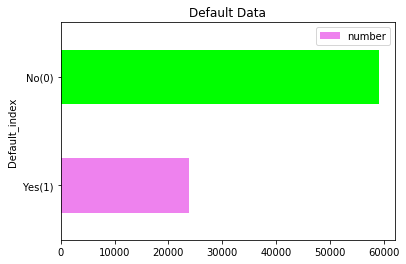

In [5]:
# label_len=len(dtrain_label)
label_pos=(np.sum(train_data_label==1)) #those who default
label_neg=(np.sum(train_data_label==0))
# print(label_len)
# print(label_pos)
# print(label_neg)
df = pd.DataFrame({'Default_index':[ 'Yes(1)','No(0)'], 'number':[label_pos, label_neg]})
df.plot.barh(x='Default_index', y='number', rot=0, color=['violet','lime'], title='Default Data')


In [6]:
dtrain=dtrain.apply(pd.to_numeric)
dval=dval.apply(pd.to_numeric)

In [7]:
dtrain.isnull().sum()

mvar1      2480
mvar2      3943
mvar3       355
mvar4       355
mvar5       355
mvar6     13301
mvar7      5184
mvar8     13303
mvar9      7837
mvar10      355
mvar11    31344
mvar12     9812
mvar13     6553
mvar14        0
mvar15    22611
mvar16    12980
mvar17    11128
mvar18    10353
mvar19        4
mvar20      355
mvar21    15769
mvar22    20622
mvar23    28408
mvar24    13179
mvar25     5278
mvar26     7328
mvar27     9186
mvar28      355
mvar29      355
mvar30    25407
mvar31    39240
mvar32     5278
mvar33     1245
mvar34      355
mvar35    23444
mvar36     2110
mvar37     5278
mvar38      355
mvar39     4277
mvar40    43559
mvar41    38298
mvar42     1351
mvar43      584
mvar44     5481
mvar45    30693
mvar46    15786
mvar47        0
mvar48        0
dtype: int64

In [8]:
dtrain.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47,mvar48
count,53130.00000,51667.000000,55255.000000,55255.000000,55255.000000,42309.000000,5.042600e+04,42307.000000,47773.000000,5.525500e+04,...,51333.000000,12051.000000,17312.000000,54259.000000,55026.000000,50129.000000,24917.000000,39824.000000,55610.000000,55610.000000
mean,1747.48099,1.050579,5.400113,0.462327,1.062616,1640.457350,1.763674e+04,6857.849930,34068.152304,3.038266e+04,...,0.088403,97.710751,72.036296,0.330934,6.548831,0.706185,0.072441,0.092281,0.253444,553.926686
std,94.82923,1.553743,10.991708,1.718030,5.634562,3657.128755,4.936680e+04,10048.481971,50569.461760,6.831220e+04,...,0.430759,29.858730,24.514494,0.373747,6.266940,0.246132,0.295131,0.328289,0.967359,1104.871016
min,1477.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.018000,0.000000,0.000000,0.000000,0.060660,0.000000,0.000000,-1.000000,2.000000
25%,1680.00000,0.130750,0.000000,0.000000,0.000000,41.000000,1.766000e+03,496.000000,3568.000000,1.159000e+03,...,0.000000,89.948000,58.113750,0.000000,2.000000,0.514650,0.000000,0.000000,-1.000000,8.000000
50%,1743.00000,0.511100,0.300000,0.000000,0.000000,297.000000,7.089500e+03,2569.000000,14532.000000,9.604000e+03,...,0.000000,100.000000,78.971000,0.200000,5.000000,0.739330,0.000000,0.000000,1.000000,17.000000
75%,1813.00000,1.377650,6.596000,0.000000,0.000000,1387.000000,1.818550e+04,9910.000000,44347.000000,3.450600e+04,...,0.000000,111.139500,91.599500,0.562500,10.000000,0.944960,0.000000,0.000000,1.000000,111.000000
max,1950.00000,31.018100,333.124000,25.754000,156.878000,87875.000000,5.637108e+06,223123.000000,840658.000000,5.647073e+06,...,21.000000,631.360000,182.111000,2.000000,91.000000,1.000000,7.000000,4.000000,1.000000,3247.000000


In [9]:
dtrain.dropna(thresh=30000,axis=1,inplace=False)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar36,mvar37,mvar38,mvar39,mvar42,mvar43,mvar44,mvar46,mvar47,mvar48
38730,1624.0,0.3901,35.948,0.786,0.000,0.0,4443.0,0.0,786.0,4497.0,...,13.0,3.0,10.0,0.0,0.61290,10.0,0.86441,0.0,1,12
49928,1685.0,0.6951,11.608,0.000,3.962,NaN,189.0,NaN,NaN,189.0,...,4.0,0.0,1.0,0.0,1.33333,0.0,0.79366,NaN,-1,3247
21815,1741.0,0.7178,4.747,0.000,4.747,28.0,1187.0,890.0,7958.0,2870.0,...,8.0,1.0,5.0,0.0,0.43478,6.0,0.81077,0.0,-1,3
28076,1608.0,1.2965,5.457,0.911,0.000,NaN,3699.0,NaN,7886.0,5221.0,...,9.0,3.0,5.0,0.0,0.50000,2.0,0.61028,0.0,1,21
55674,1608.0,0.2872,5.464,0.000,0.000,0.0,0.0,0.0,22724.0,0.0,...,15.0,4.0,14.0,0.0,0.71429,2.0,1.00000,NaN,1,3247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1845.0,0.1332,0.000,0.000,0.000,2180.0,16681.0,16681.0,51829.0,37515.0,...,2.0,9.0,2.0,0.0,0.00000,6.0,0.77735,0.0,1,20
54886,1821.0,0.0083,0.000,0.000,0.000,6521.0,10736.0,10736.0,29748.0,17257.0,...,2.0,7.0,0.0,0.0,0.00000,5.0,0.73518,0.0,1,3247
76820,1597.0,0.1065,21.242,0.000,17.853,NaN,NaN,NaN,NaN,0.0,...,13.0,NaN,3.0,NaN,1.05000,0.0,NaN,NaN,-1,732
860,NaN,0.7734,11.960,0.000,0.000,NaN,NaN,NaN,NaN,0.0,...,3.0,NaN,3.0,NaN,1.00000,0.0,NaN,0.0,1,11


In [10]:
dtrain.dropna(thresh=30000,axis=1,inplace=True)
dtrain.isnull().sum()

mvar1      2480
mvar2      3943
mvar3       355
mvar4       355
mvar5       355
mvar6     13301
mvar7      5184
mvar8     13303
mvar9      7837
mvar10      355
mvar12     9812
mvar13     6553
mvar14        0
mvar15    22611
mvar16    12980
mvar17    11128
mvar18    10353
mvar19        4
mvar20      355
mvar21    15769
mvar22    20622
mvar24    13179
mvar25     5278
mvar26     7328
mvar27     9186
mvar28      355
mvar29      355
mvar30    25407
mvar32     5278
mvar33     1245
mvar34      355
mvar35    23444
mvar36     2110
mvar37     5278
mvar38      355
mvar39     4277
mvar42     1351
mvar43      584
mvar44     5481
mvar46    15786
mvar47        0
mvar48        0
dtype: int64

In [11]:
# note that we have dropped mvar11, mvar23, mvar31, mvar40,,mvar41,mvar45,
# we have to do it manually for validation and test data
X_train=dtrain.fillna(dtrain.mean())
Y_train=dtrain_label
dval=dval.drop(['mvar11','mvar23','mvar31','mvar40','mvar41','mvar45'],axis=1)
X_val=dval.fillna(dval.mean())
Y_val=dval_label

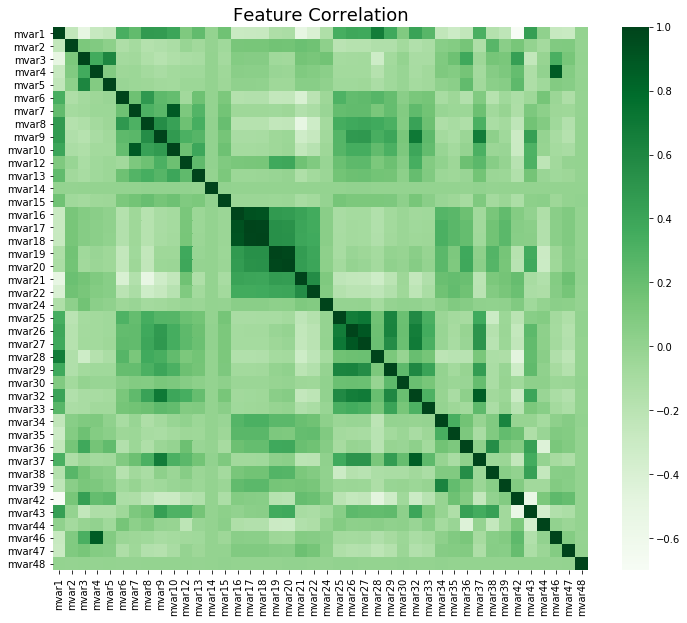

In [28]:
# Lets draw Correlation between features
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Greens)
plt.title("Feature Correlation", {"fontsize": 18});


In [26]:
# run random forest classifier 
rfc=RandomForestClassifier(n_estimators=300,criterion='gini',min_samples_split=3,
    min_samples_leaf=5,max_features='auto', bootstrap=True)
# Fit on training data
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(rfc.feature_importances_)[::-1]
plt.figure(figsize=(15, 6))
plt.bar(range(0, 42), importances[indices], align="edge",color="orange")
plt.xticks(range(0, 42),X_train.columns[indices],rotation=90)
plt.title("Feature Importance - randomForest", {"fontsize": 16});

In [27]:
Y_train_pred_rfc=rfc.predict(X_train)
Y_val_pred_rfc=rfc.predict(X_val)
# print(accuracy_score(Y_train,Y_train_pred_rfc))
# print(accuracy_score(Y_val,Y_val_pred_rfc))

Prediction results:
precision = 0.6859291084854995
recall = 0.40571791613722996
accuracy = 0.7758671047827674


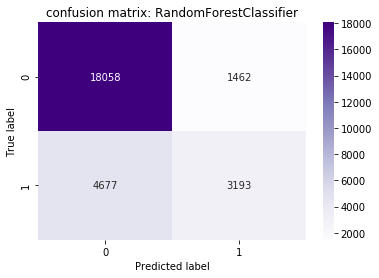

In [29]:
conf_rfc=confusion_matrix(Y_val,Y_val_pred_rfc)
# print(np.sum(conf_rfc))
plotConfMat(conf_rfc,'RandomForestClassifier')

# Building models:




In [19]:
# plots confusion matrix and prints precision, recall and accuracy.
def plotConfMat(conf_mat,title):
    precision=conf_mat[1][1]/(conf_mat[1][1]+conf_mat[0][1])
    recall=conf_mat[1][1]/(conf_mat[1][1]+conf_mat[1][0])
    accuracy=(conf_mat[1][1]+conf_mat[0][0])/(np.sum(conf_mat))
    sns.heatmap(conf_mat, annot=True, fmt="d",linecolor='black', cmap=plt.cm.Purples)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('confusion matrix: '+title)
    print("Prediction results:")
    print("precision = "+str(precision))
    print("recall = "+str(recall))
    print("accuracy = "+str(accuracy))

## 1. Logistic Regression

## 2. K Nearest Neighbours

In [18]:
knn_classif = KNeighborsClassifier(n_neighbors=399, weights='distance')
knn_classif.fit(X_train, Y_train)
Y_val_pred_knn = knn_classif.predict(X_val)

Prediction results:
precision = 0.5647058823529412
recall = 0.1707750952986023
accuracy = 0.7239138371668492


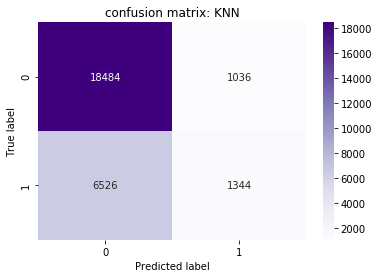

In [98]:
conf_knn=confusion_matrix(Y_val,Y_val_pred_knn)
# print(np.sum(conf_knn))
plotConfMat(conf_knn,'KNN')

## 3. Decision Tree

In [147]:
DecTree_algo= tree.DecisionTreeClassifier(criterion='gini',
    splitter='best')
DecTree_classif= DecTree_algo.fit(X_train, Y_train)
Y_val_pred_dt=DecTree_classif.predict(X_val)

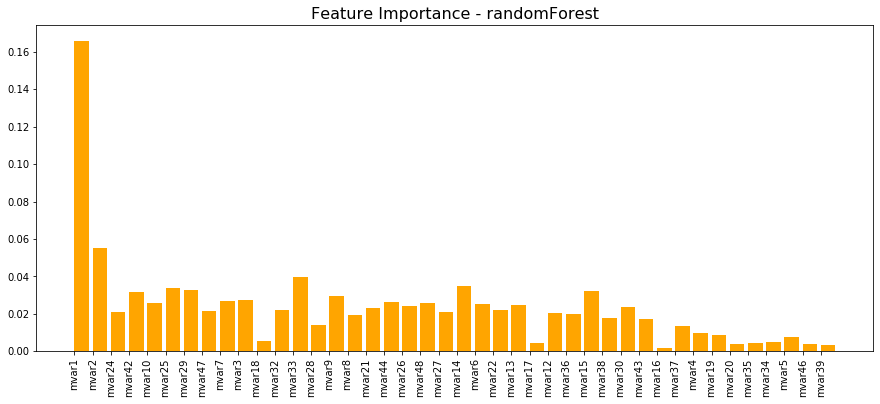

In [148]:
importances = DecTree_classif.feature_importances_
indices = np.argsort(rfc.feature_importances_)[::-1]
plt.figure(figsize=(15, 6))
plt.bar(range(0, 42), importances[indices], align="edge",color="orange")
plt.xticks(range(0, 42),X_train.columns[indices],rotation=90)
plt.title("Feature Importance - randomForest", {"fontsize": 16});

Prediction results:
precision = 0.4437538086532602
recall = 0.46264294790343075
accuracy = 0.6789704271631982


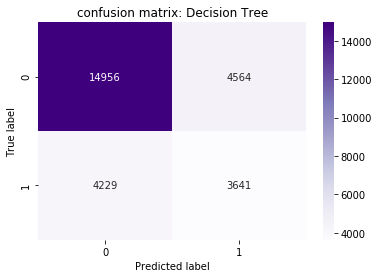

In [149]:
conf_dt=confusion_matrix(Y_val,Y_val_pred_dt)
# print(np.sum(conf_knn))
plotConfMat(conf_dt,'Decision Tree')

## 4. Support Vector Classifier

In [ ]:
svc_algo =  SVC(C=1, gamma='auto')
svc_classif=svc_algo.fit(X_train,Y_train)




In [ ]:
Y_train_pred_svc = svc_algo.decision_function(X_train)
Y_val_pred_svc = svc_algo.decision_function(X_val)
print(accuracy_score(Y_train,Y_train_pred_svc))
print(accuracy_score(Y_val,Y_val_pred_svc))

## 5. Random Forest ensemble

In [14]:
# run random forest classifier 
rfc=RandomForestClassifier(n_estimators=300,criterion='gini',min_samples_split=3,
    min_samples_leaf=5,max_features='auto', bootstrap=True)
# Fit on training data
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

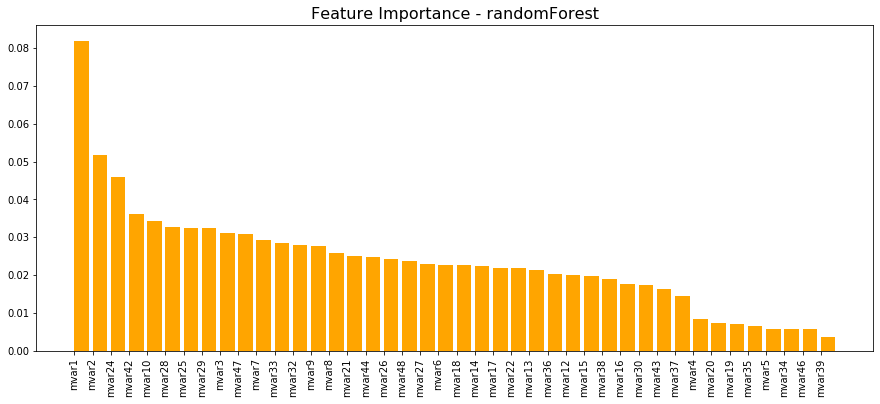

In [15]:
importances = rfc.feature_importances_
indices = np.argsort(rfc.feature_importances_)[::-1]
plt.figure(figsize=(15, 6))
plt.bar(range(0, 42), importances[indices], align="edge",color="orange")
plt.xticks(range(0, 42),X_train.columns[indices],rotation=90)
plt.title("Feature Importance - randomForest", {"fontsize": 16});

In [17]:
Y_train_pred_rfc=rfc.predict(X_train)
Y_val_pred_rfc=rfc.predict(X_val)
# print(accuracy_score(Y_train,Y_train_pred_rfc))
# print(accuracy_score(Y_val,Y_val_pred_rfc))

In [24]:
conf_rfc=confusion_matrix(Y_val,Y_val_pred_rfc)
# print(np.sum(conf_rfc))
plotConfMat(conf_rfc,'RandomForestClassifier')

## 6. Xgboost

In [204]:
xgb_model=xgb.XGBClassifier(random_state=1, steps=100, learning_rate=0.01, reg_alpha=1e-6, reg_lambda=0.01)
xgb_model.fit(X_train, Y_train)
# xgb_model.score(X_val,Y_val)
Y_val_pred_xgb=xgb_model.predict(X_val)

Prediction results:
precision = 0.6691967109424415
recall = 0.26886912325285894
accuracy = 0.7517342095655348


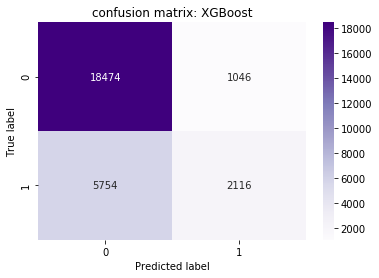

In [205]:
conf_xgb=confusion_matrix(Y_val,Y_val_pred_xgb)
# print(np.sum(conf_rfc))
plotConfMat(conf_xgb,'XGBoost')